In [1]:
import numpy as np 
import pandas as pd 
import scipy
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform
from __future__ import print_function, division
import keras
from keras.layers import Input, Dense, Reshape, Flatten, Dropout, Concatenate
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import datetime
import sys
import os

In [2]:
generator=keras.models.load_model('/content/drive/MyDrive/Brain_tumor_Segmentation/huzaifa_data/Models/Models/C_Gans_Generator/CGAN_model_generator.h5')

In [ ]:
generator.summary()

In [4]:
img = np.load('/content/drive/MyDrive/Brain_tumor_Segmentation/huzaifa_data/Prepared_MRI_data/mask_array.npy')

In [5]:
img.shape

(14026, 128, 128)

In [7]:
import random

In [24]:
rand = random.randint(0,14026)
batch = img[rand:rand+64,:,:]
batch.shape
#plt.imshow(img[rand:rand+63,:,:])

(64, 128, 128)

In [27]:
import tensorflow as tf

In [30]:
from tensorflow.keras.utils import to_categorical

In [ ]:
tf.keras.utils.to_categorical

In [31]:
batch = tf.keras.utils.to_categorical(batch)

In [32]:
batch.shape

(64, 128, 128, 4)

In [33]:
pred = generator.predict(batch)

In [4]:
import os
import glob
from glob import glob

In [3]:
a = os.listdir('/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans')

In [5]:
im_list = []
for i in range(636,700):
  x = plt.imread("/content/drive/MyDrive/Brain_tumor_Segmentation/GANS/generated data from dc gans/"+a[i])
  im_list.append(x)

In [6]:
im_array = np.asarray(im_list)

In [7]:
im_array.shape

(64, 128, 128, 4)

In [8]:
pred = generator.predict(im_array)

In [9]:
pred.shape

(64, 128, 128, 1)

In [10]:
import random

In [32]:
rand = random.randint(0,63)
x = np.unique(im_array[rand,:,:])
x

array([0.00392157, 0.14117648, 0.26666668, 0.32941177, 0.90588236,
       0.99215686, 1.        ], dtype=float32)

In [21]:
x

array([0.00392157, 0.14117648, 0.1882353 , 0.20784314, 0.26666668,
       0.32941177, 0.40392157, 0.47058824, 0.5529412 , 0.7176471 ,
       0.90588236, 0.99215686, 1.        ], dtype=float32)

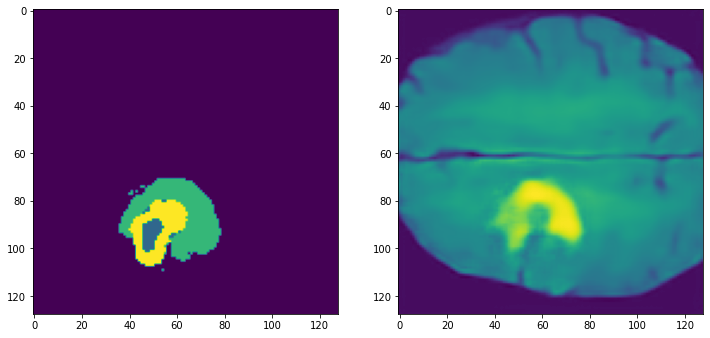

In [80]:
rand = random.randint(0,63)
plt.figure(figsize=(12, 8))
plt.subplot(121)
msk = np.argmax(batch, axis = 3)

plt.imshow(msk[rand,:,:])
plt.subplot(122)
plt.imshow(pred[rand,:,:,0])

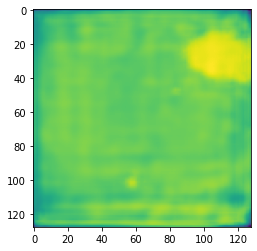

In [ ]:
rand = random.randint(0,63)
plt.imshow(pred[rand,:,:,0])